# Wine Quality Prediction

Data Source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import set_config
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12.0, 9.0]
plt.rcParams['font.size'] = 12
set_config(display='diagram')                                           # HTML representation of Pipeline (display diagram)
path = os.getcwd()                                                      # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file_white = os.path.join('datasets', 'winequality-white.csv')          # import white wine dataframe
df_white = pd.read_csv(file_white)

In [4]:
file_red = os.path.join('datasets', 'winequality-red.csv')              # import red wine dataframe
df_red = pd.read_csv(file_red)

# Head and Tail

In [5]:
df_white['color'] = 'white'
df_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      45.00   
1               6.3              0.30         0.34             1.6      49.00   
2               8.1              0.28         0.40             6.9       0.05   
3               7.2              0.23         0.32             8.5      58.00   
4               7.2              0.23         0.32             8.5      58.00   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      39.00   
4894            6.6              0.32         0.36             8.0      47.00   
4895            6.5              0.24         0.19             1.2      41.00   
4896            5.5              0.29         0.30             1.1      22.00   
4897            6.0              0.21         0.38             0.8       0.02   

      free sulfur dioxide  total sulfur dioxide     density    pH  sulphates  \
0                    45.0                 170.0  1001.00000  3.00       0.45   
1                    14.0                 132.0   994.00000  3.30       0.49   
2                    30.0                  97.0     0.99510  3.26       0.44   
3                    47.0                 186.0     0.99560  3.19       0.40   
4                    47.0                 186.0     0.99560  3.19       0.40   
...                   ...                   ...         ...   ...        ...   
4893                 24.0                  92.0     0.99114  3.27       0.50   
4894                 57.0                 168.0     0.99490  3.15       0.46   
4895                 30.0                 111.0     0.99254  2.99       0.46   
4896                 20.0                 110.0     0.98869  3.34       0.38   
4897                 22.0                  98.0     0.98941  3.26       0.32   

      alcohol  quality  color  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[4898 rows x 13 columns]

In [6]:
df_red['color'] = 'red'
df_red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      76.00   
1               7.8              0.88         0.00             2.6      98.00   
2               7.8              0.76         0.04             2.3      92.00   
3              11.2              0.28         0.56             1.9      75.00   
4               7.4              0.70         0.00             1.9      76.00   
...             ...               ...          ...             ...        ...   
1594            6.2              0.60         0.08             2.0       0.09   
1595            5.9              0.55         0.10             2.2      62.00   
1596            6.3              0.51         0.13             2.3      76.00   
1597            5.9            645.00         0.12             2.0      75.00   
1598            6.0              0.31         0.47             3.6      67.00   

      free sulfur dioxide  total sulfur dioxide    density    pH  sulphates  \
0                    11.0                  34.0    0.99780  3.51       0.56   
1                    25.0                  67.0    0.99680  3.20       0.68   
2                    15.0                  54.0  997.00000  3.26       0.65   
3                    17.0                  60.0  998.00000  3.16       0.58   
4                    11.0                  34.0    0.99780  3.51       0.56   
...                   ...                   ...        ...   ...        ...   
1594                 32.0                  44.0    0.99490  3.45       0.58   
1595                 39.0                  51.0    0.99512  3.52       0.76   
1596                 29.0                  40.0    0.99574  3.42       0.75   
1597                 32.0                  44.0    0.99547  3.57       0.71   
1598                 18.0                  42.0    0.99549  3.39       0.66   

      alcohol  quality color  
0         9.4        5   red  
1         9.8        5   red  
2         9.8        5   red  
3         9.8        6   red  
4         9.4        5   red  
...       ...      ...   ...  
1594     10.5        5   red  
1595     11.2        6   red  
1596     11.0        6   red  
1597     10.2        5   red  
1598     11.0        6   red  

[1599 rows x 13 columns]

In [7]:
df_concat = pd.concat([df_white, df_red])                       # stack the two DataFrames
df_concat

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      45.00   
1               6.3              0.30         0.34             1.6      49.00   
2               8.1              0.28         0.40             6.9       0.05   
3               7.2              0.23         0.32             8.5      58.00   
4               7.2              0.23         0.32             8.5      58.00   
...             ...               ...          ...             ...        ...   
1594            6.2              0.60         0.08             2.0       0.09   
1595            5.9              0.55         0.10             2.2      62.00   
1596            6.3              0.51         0.13             2.3      76.00   
1597            5.9            645.00         0.12             2.0      75.00   
1598            6.0              0.31         0.47             3.6      67.00   

      free sulfur dioxide  total sulfur dioxide     density    pH  sulphates  \
0                    45.0                 170.0  1001.00000  3.00       0.45   
1                    14.0                 132.0   994.00000  3.30       0.49   
2                    30.0                  97.0     0.99510  3.26       0.44   
3                    47.0                 186.0     0.99560  3.19       0.40   
4                    47.0                 186.0     0.99560  3.19       0.40   
...                   ...                   ...         ...   ...        ...   
1594                 32.0                  44.0     0.99490  3.45       0.58   
1595                 39.0                  51.0     0.99512  3.52       0.76   
1596                 29.0                  40.0     0.99574  3.42       0.75   
1597                 32.0                  44.0     0.99547  3.57       0.71   
1598                 18.0                  42.0     0.99549  3.39       0.66   

      alcohol  quality  color  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
1594     10.5        5    red  
1595     11.2        6    red  
1596     11.0        6    red  
1597     10.2        5    red  
1598     11.0        6    red  

[6497 rows x 13 columns]

In [8]:
df_concat.shape

(6497, 13)

In [9]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [10]:
df_concat.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307         29.488570     0.318633        5.443235   
std         1.296434        134.738314     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.300000     0.310000        3.000000   
75%         7.700000          0.420000     0.390000        8.100000   
max        15.900000       1185.000000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean     49.680363            30.525319            115.744574    62.186637   
std      37.118821            17.749400             56.521855   238.922805   
min       0.020000             1.000000              6.000000     0.987110   
25%      34.000000            17.000000             77.000000     0.992500   
50%      45.000000            29.000000            118.000000     0.995200   
75%      59.000000            41.000000            156.000000     0.997400   
max     611.000000           289.000000            440.000000  1001.000000   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

# Kernel density estimation

In [11]:
# Kernel density estimation helper function
def plot_kde(df, colname: str):
    return sns.kdeplot(data=df[colname])

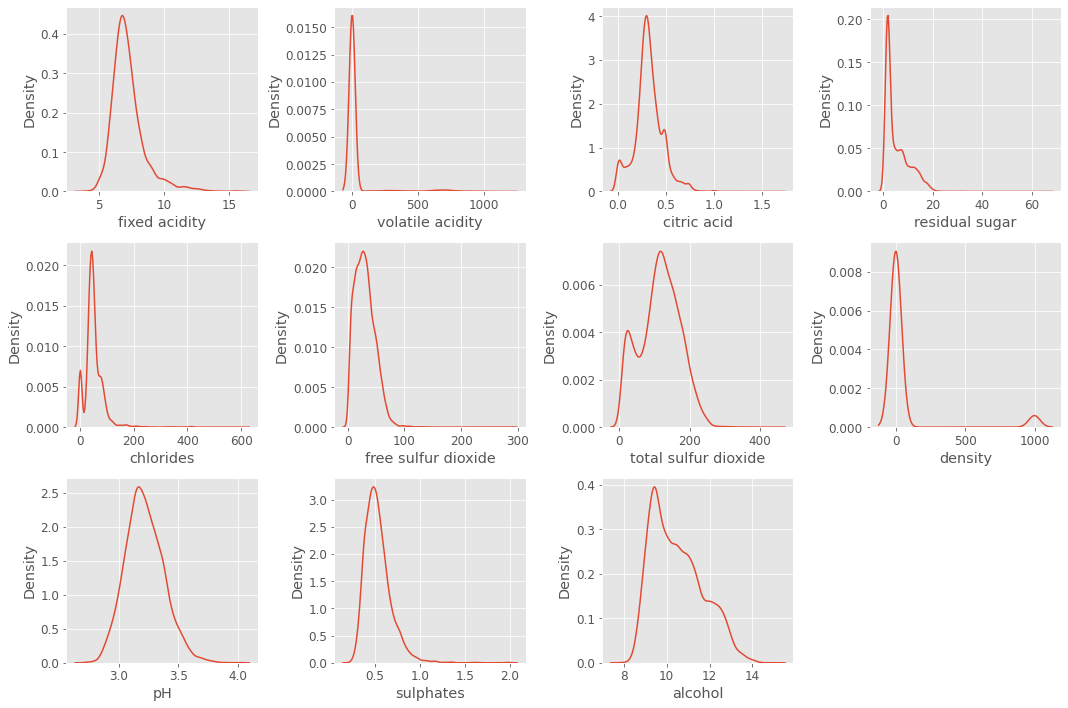

In [12]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

plt.figure(figsize=(15, 10))
for i in range(11):
    plt.subplot(3, 4, i+1)
    data = df_concat[cols]
    plot_kde(df=df_concat, colname=cols[i])

In [13]:
df_concat

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      45.00   
1               6.3              0.30         0.34             1.6      49.00   
2               8.1              0.28         0.40             6.9       0.05   
3               7.2              0.23         0.32             8.5      58.00   
4               7.2              0.23         0.32             8.5      58.00   
...             ...               ...          ...             ...        ...   
1594            6.2              0.60         0.08             2.0       0.09   
1595            5.9              0.55         0.10             2.2      62.00   
1596            6.3              0.51         0.13             2.3      76.00   
1597            5.9            645.00         0.12             2.0      75.00   
1598            6.0              0.31         0.47             3.6      67.00   

      free sulfur dioxide  total sulfur dioxide     density    pH  sulphates  \
0                    45.0                 170.0  1001.00000  3.00       0.45   
1                    14.0                 132.0   994.00000  3.30       0.49   
2                    30.0                  97.0     0.99510  3.26       0.44   
3                    47.0                 186.0     0.99560  3.19       0.40   
4                    47.0                 186.0     0.99560  3.19       0.40   
...                   ...                   ...         ...   ...        ...   
1594                 32.0                  44.0     0.99490  3.45       0.58   
1595                 39.0                  51.0     0.99512  3.52       0.76   
1596                 29.0                  40.0     0.99574  3.42       0.75   
1597                 32.0                  44.0     0.99547  3.57       0.71   
1598                 18.0                  42.0     0.99549  3.39       0.66   

      alcohol  quality  color  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
1594     10.5        5    red  
1595     11.2        6    red  
1596     11.0        6    red  
1597     10.2        5    red  
1598     11.0        6    red  

[6497 rows x 13 columns]

# Correlation Coefficient

In [14]:
corr_matrix = df_concat.corr()
corr_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.051892     0.324436   
volatile acidity           0.051892          1.000000    -0.192578   
citric acid                0.324436         -0.192578     1.000000   
residual sugar            -0.111981         -0.077907     0.142451   
chlorides                  0.251317          0.130066     0.031605   
free sulfur dioxide       -0.282735         -0.145671     0.133126   
total sulfur dioxide      -0.329054         -0.174251     0.195242   
density                    0.052884          0.003774     0.027518   
pH                        -0.252700          0.123957    -0.329808   
sulphates                  0.299568          0.073735     0.056197   
alcohol                   -0.095452         -0.045033    -0.010493   
quality                   -0.076743         -0.119304     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.251317            -0.282735   
volatile acidity           -0.077907   0.130066            -0.145671   
citric acid                 0.142451   0.031605             0.133126   
residual sugar              1.000000  -0.108632             0.402871   
chlorides                  -0.108632   1.000000            -0.162047   
free sulfur dioxide         0.402871  -0.162047             1.000000   
total sulfur dioxide        0.495482  -0.240546             0.720934   
density                    -0.017302  -0.006012            -0.014597   
pH                         -0.267320   0.048083            -0.145854   
sulphates                  -0.185927   0.306590            -0.188457   
alcohol                    -0.359415  -0.212730            -0.179838   
quality                    -0.036980  -0.148992             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.052884 -0.252700   0.299568   
volatile acidity                 -0.174251  0.003774  0.123957   0.073735   
citric acid                       0.195242  0.027518 -0.329808   0.056197   
residual sugar                    0.495482 -0.017302 -0.267320  -0.185927   
chlorides                        -0.240546 -0.006012  0.048083   0.306590   
free sulfur dioxide               0.720934 -0.014597 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.005191 -0.238413  -0.275727   
density                           0.005191  1.000000 -0.006092   0.005926   
pH                               -0.238413 -0.006092  1.000000   0.192123   
sulphates                        -0.275727  0.005926  0.192123   1.000000   
alcohol                          -0.265740 -0.022478  0.121248  -0.003029   
quality                          -0.041385 -0.004839  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.045033 -0.119304  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.212730 -0.148992  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.022478 -0.004839  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

In [15]:
corr_matrix.shape

(12, 12)

In [16]:
corr_matrix['quality'].sort_values(ascending=False)                     # correlation of feature columns to target

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
density                -0.004839
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
volatile acidity       -0.119304
chlorides              -0.148992
Name: quality, dtype: float64

plot heatmap - absolute value(0-0.3; weak/no relationship, 0.3-0.7; moderate, > 0.7 strong correlation)

<AxesSubplot:>

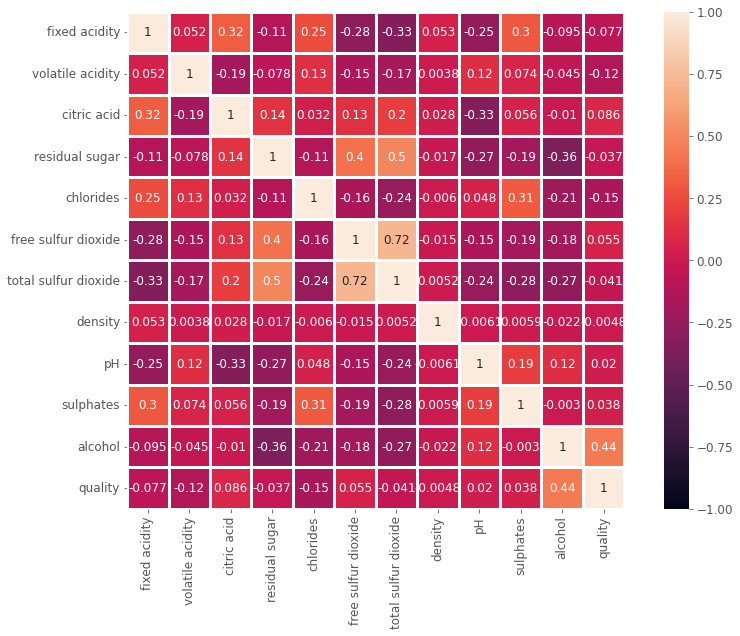

In [17]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, linewidths=3)

# Pairwise Correlation for Red Wine

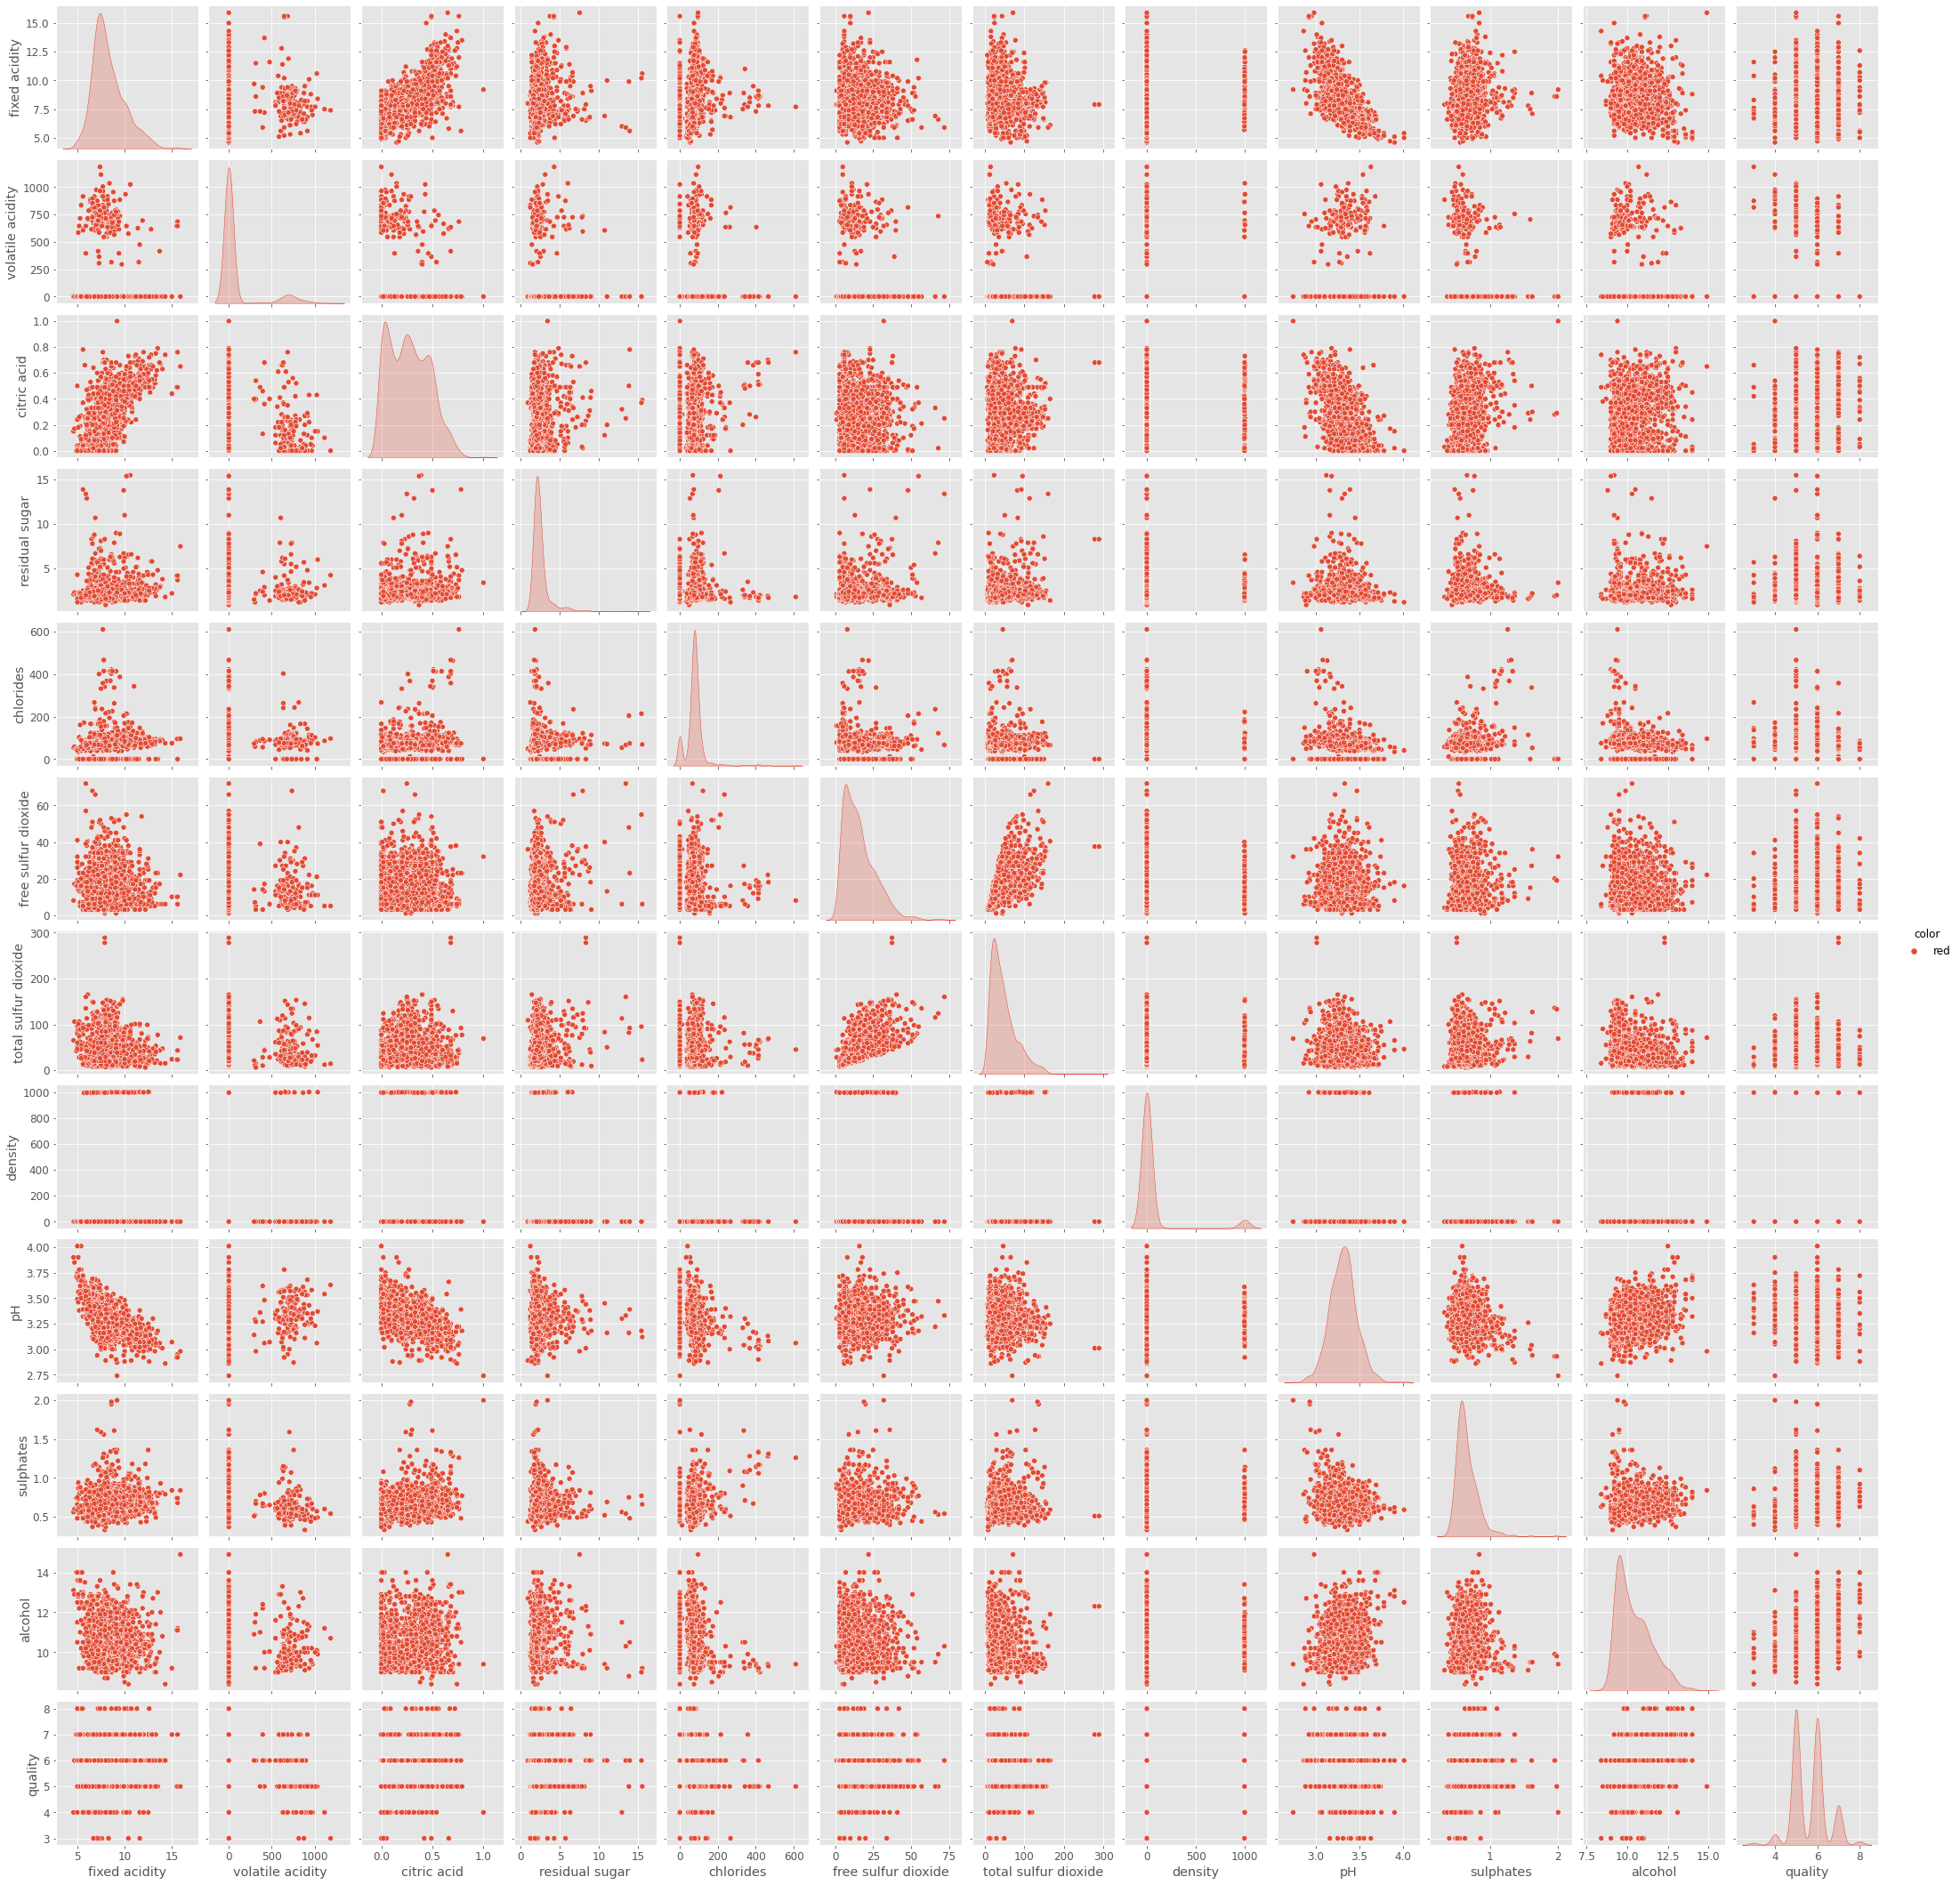

In [18]:
sns.pairplot(df_red, hue='color')  

# Pairwise Correlation for White Wine

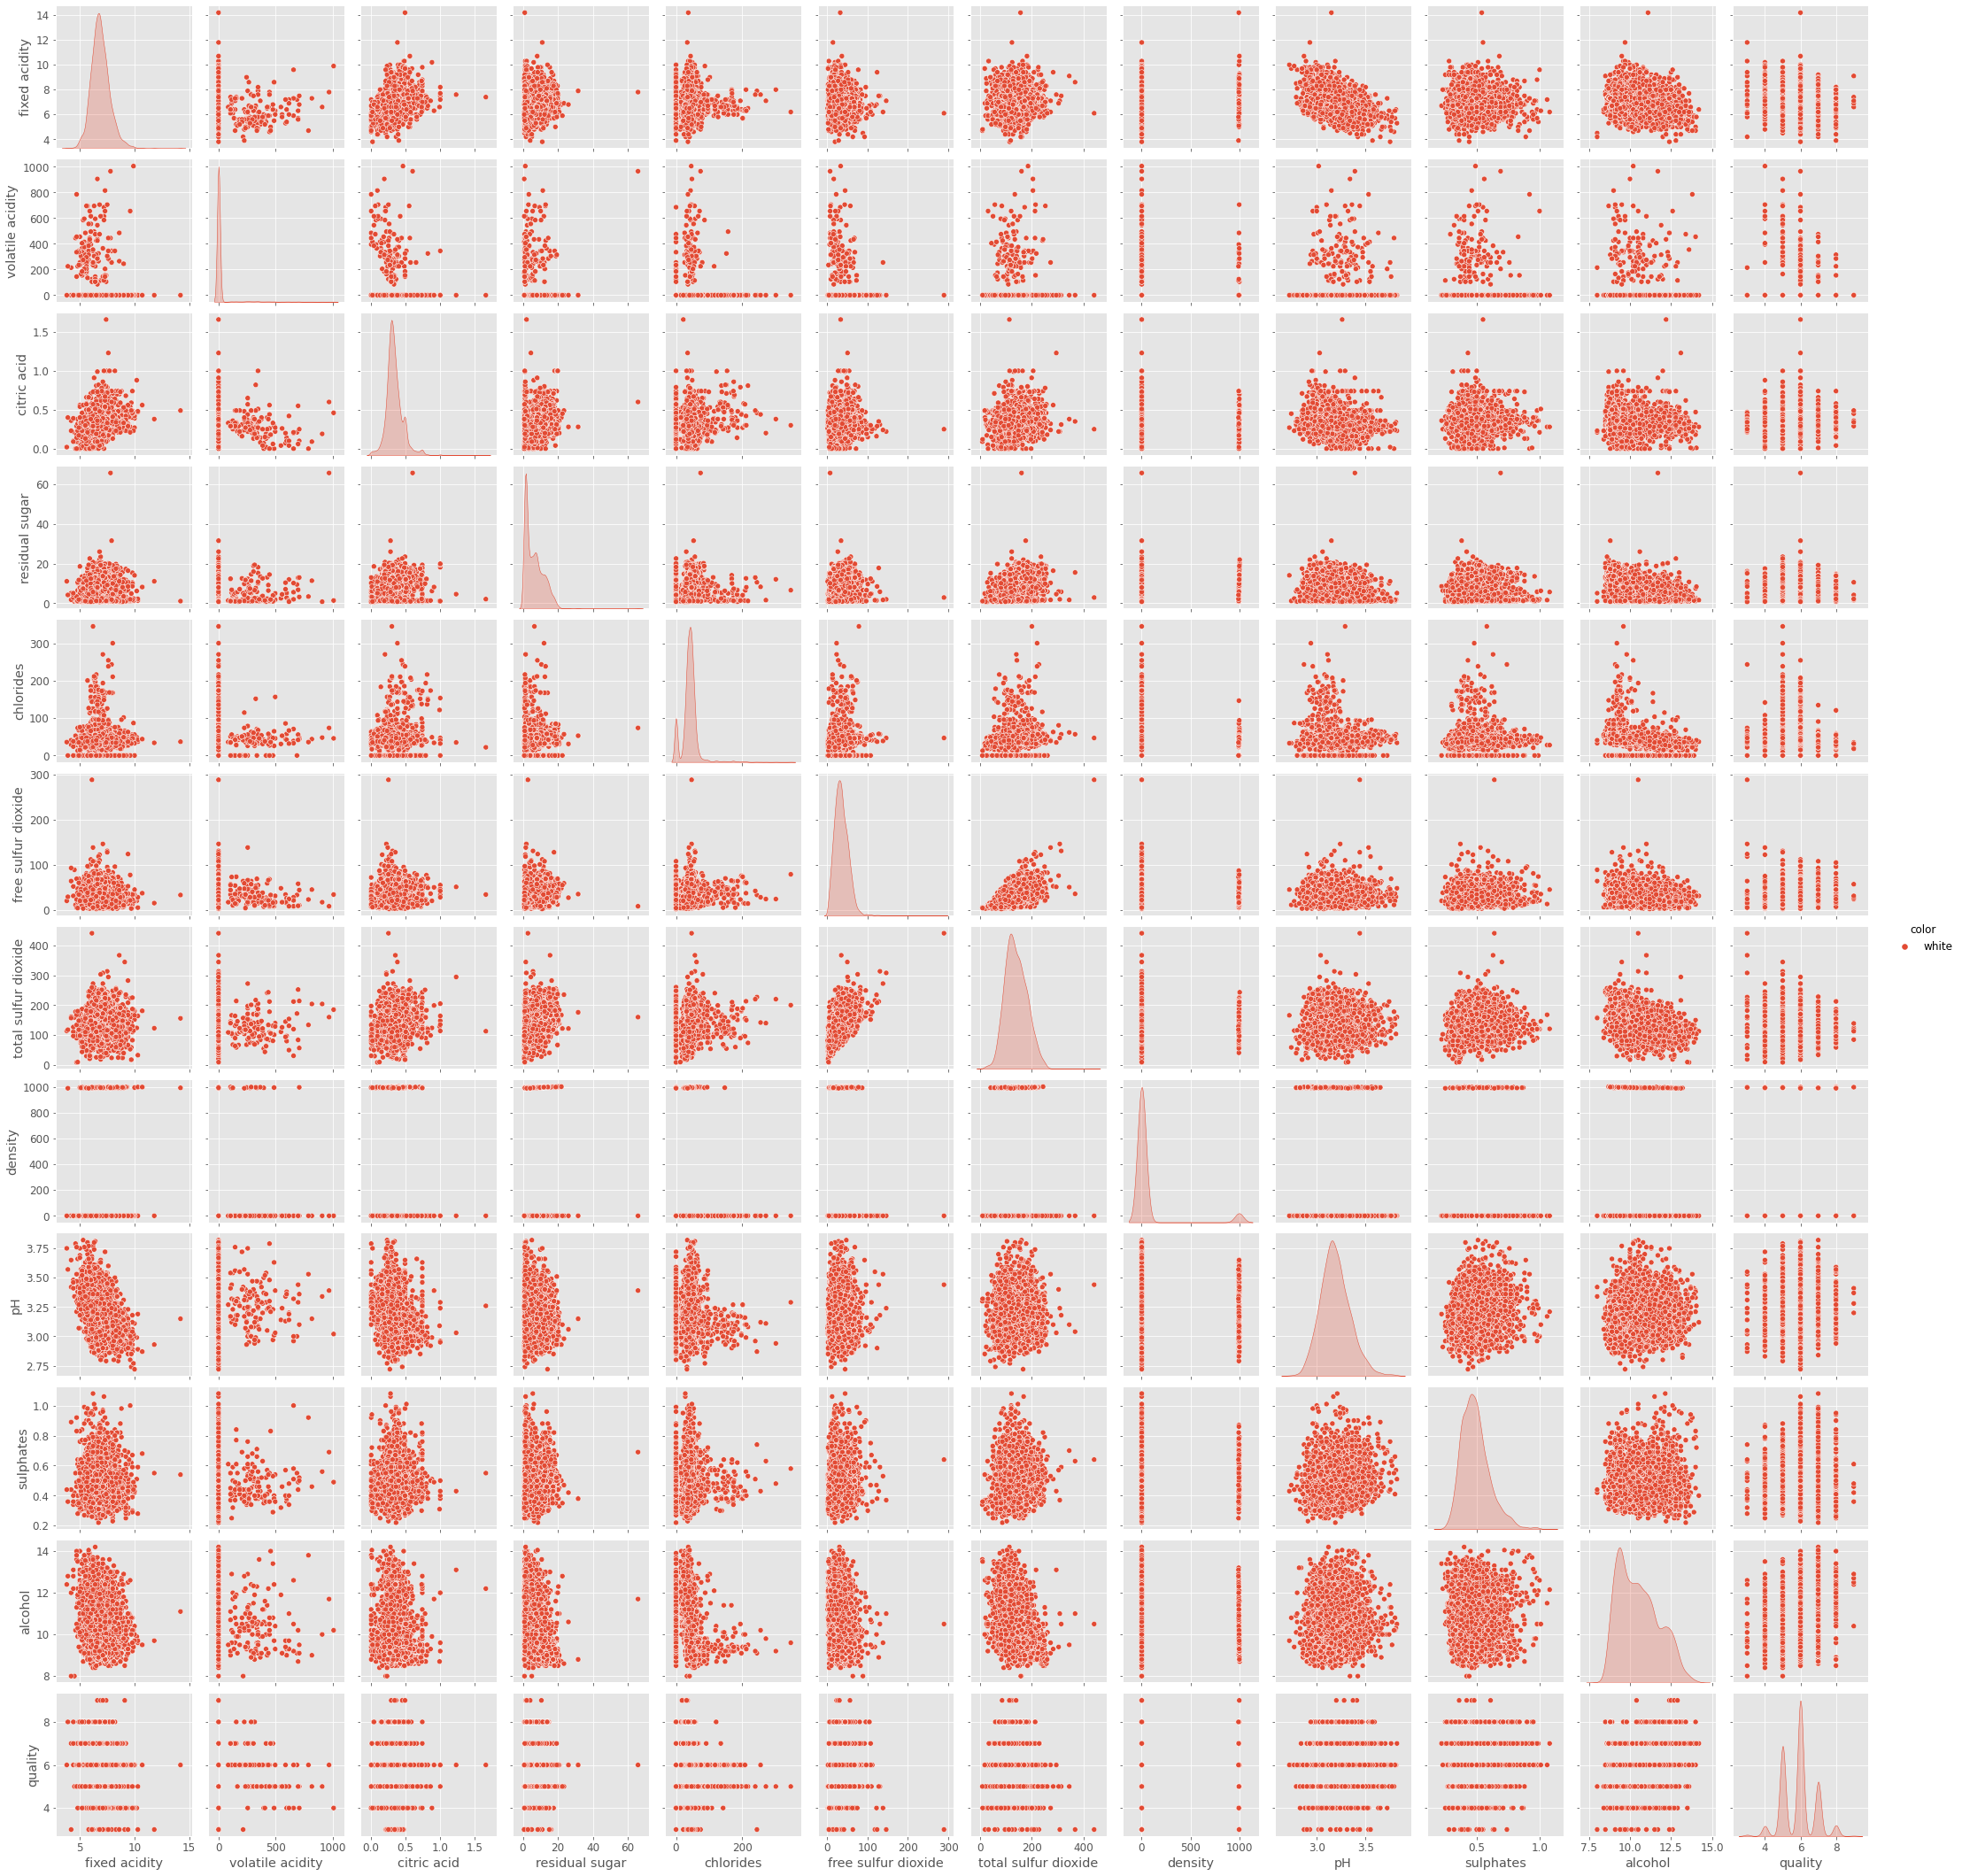

In [19]:
sns.pairplot(df_white, hue='color')

# Missing Values Exploration

In [20]:
df_concat.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

# Data Splitting

In [21]:
from sklearn.model_selection import train_test_split

feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                    'density', 'pH', 'sulphates', 'alcohol']

target_column = [ 'quality']

# train and test filtered dataframe
X, y = df_concat[feature_columns], df_concat[target_column]

In [22]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Features dimension: {0} ==> Target dimensions: {1}'.format(X.shape, y.shape))
print('X train dimensions: {0} ==> y train dimensions: {1}'.format(X_train.shape, y_train.shape))
print('X test dimensions: {0} ==> y test dimensions: {1}'.format(X_test.shape, y_test.shape))

Features dimension: (6497, 11) ==> Target dimensions: (6497, 1)
X train dimensions: (5197, 11) ==> y train dimensions: (5197, 1)
X test dimensions: (1300, 11) ==> y test dimensions: (1300, 1)


# Pipeline

Linear Support Vector Classifier

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.svm import LinearSVC 

# apply pipeline to training data 
pipe = Pipeline(steps=[
    ('qt', QuantileTransformer()), ('lsvc', LinearSVC(random_state=42))
])

pipe.fit(X_train, y_train)    

Pipeline(steps=[('qt', QuantileTransformer()),
                ('lsvc', LinearSVC(random_state=42))])

In [24]:
pipe.score(X_test, y_test)                    

0.5338461538461539

KNN Classifier

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier

# apply pipeline to training data 
pipe = Pipeline(steps=[
    ('qt', QuantileTransformer()), ('KNN_clf', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)  

Pipeline(steps=[('qt', QuantileTransformer()),
                ('KNN_clf', KNeighborsClassifier())])

In [26]:
pipe.score(X_test, y_test)

0.55

Support Vector Classifier

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.svm import SVC

# apply pipeline to training data 
pipe = Pipeline(steps=[
    ('qt', QuantileTransformer()), ('svc', SVC(random_state=42))
])

pipe.fit(X_train, y_train)  

Pipeline(steps=[('qt', QuantileTransformer()), ('svc', SVC(random_state=42))])

In [28]:
pipe.score(X_test, y_test)

0.5823076923076923

Random Forest Classifier

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier

# apply pipeline to training data 
pipe = Pipeline(steps=[
    ('qt', QuantileTransformer()), ('rfc', RandomForestClassifier(random_state=42))
])

pipe.fit(X_train, y_train)  

Pipeline(steps=[('qt', QuantileTransformer()),
                ('rfc', RandomForestClassifier(random_state=42))])

In [30]:
pipe.score(X_test, y_test)

0.6738461538461539